In [1]:
import pm4py
import pandas
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga del registro
event_log = pandas.read_csv('Data/A1-presencial-log.csv')
# Se eliminan las respuestas individuales de los cuestionarios
event_log_filtered = event_log[~event_log['NombreEvento'].str.contains(r'C?R+')]
event_log_filtered = pm4py.format_dataframe(event_log_filtered, case_id='Idusuario', activity_key='NombreEvento', timestamp_key='Hora')

In [3]:
# variants = pm4py.get_variants(event_log_filtered)
# print(variants)

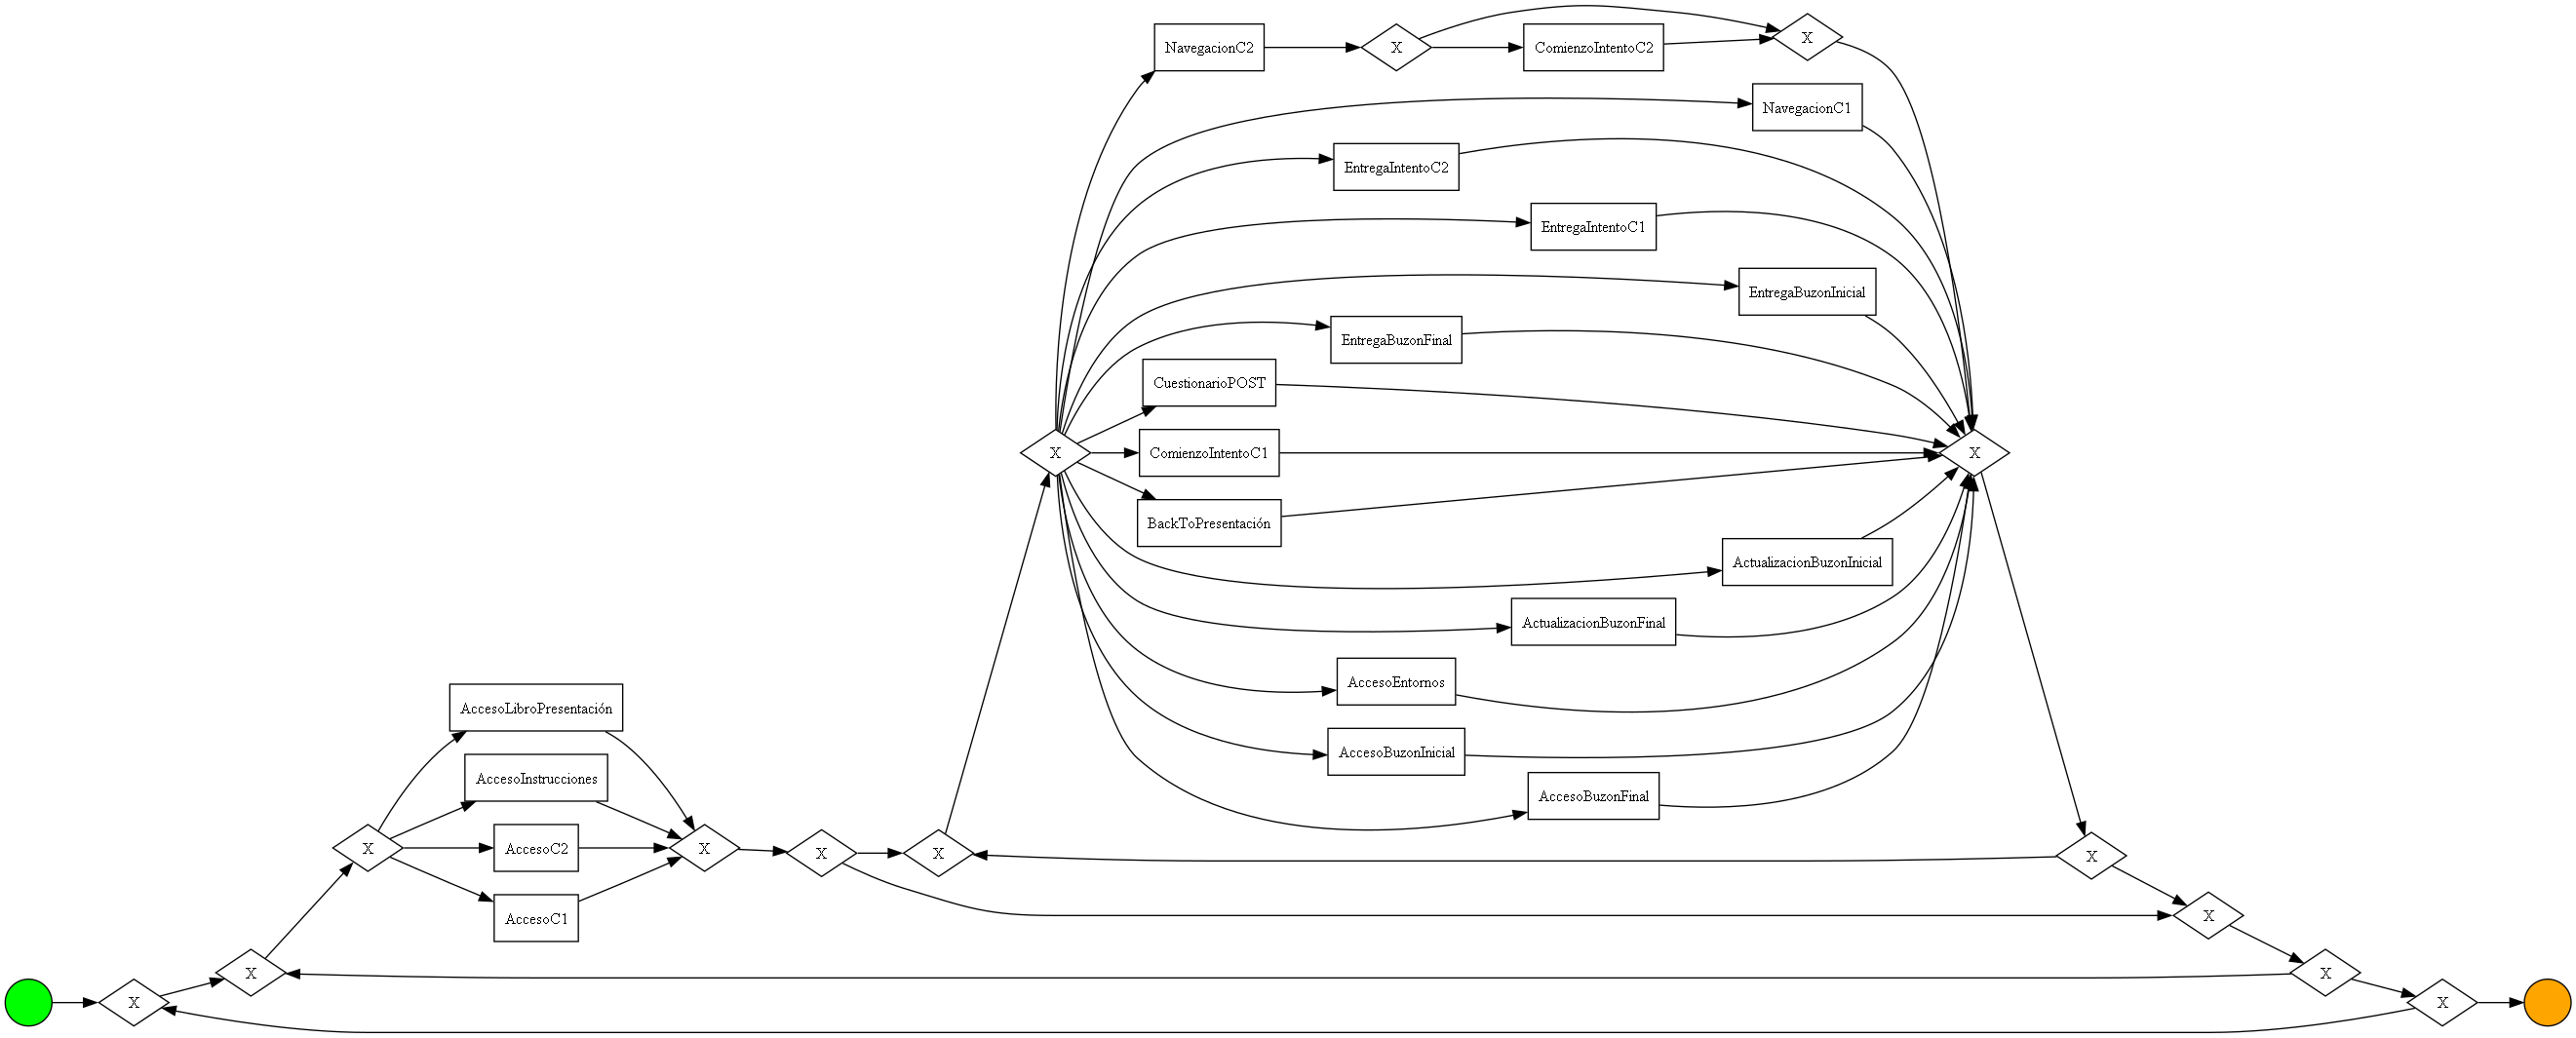

In [4]:
# Modelo BPMN
process_tree_f = pm4py.discover_process_tree_inductive(event_log_filtered)
bpmn_model_f = pm4py.convert_to_bpmn(process_tree_f)
pm4py.view_bpmn(bpmn_model_f)
pm4py.save_vis_bpmn(bpmn_model_f, 'Graphs/1-A1_full.png')

In [5]:
# pm4py.view_process_tree(process_tree_f)

In [6]:
# dfg, start_activities, end_activities = pm4py.discover_dfg(event_log_filtered)
# pm4py.view_dfg(dfg, start_activities, end_activities)

In [7]:
# map1 = pm4py.discover_heuristics_net(event_log_filtered)
# pm4py.view_heuristics_net(map1)

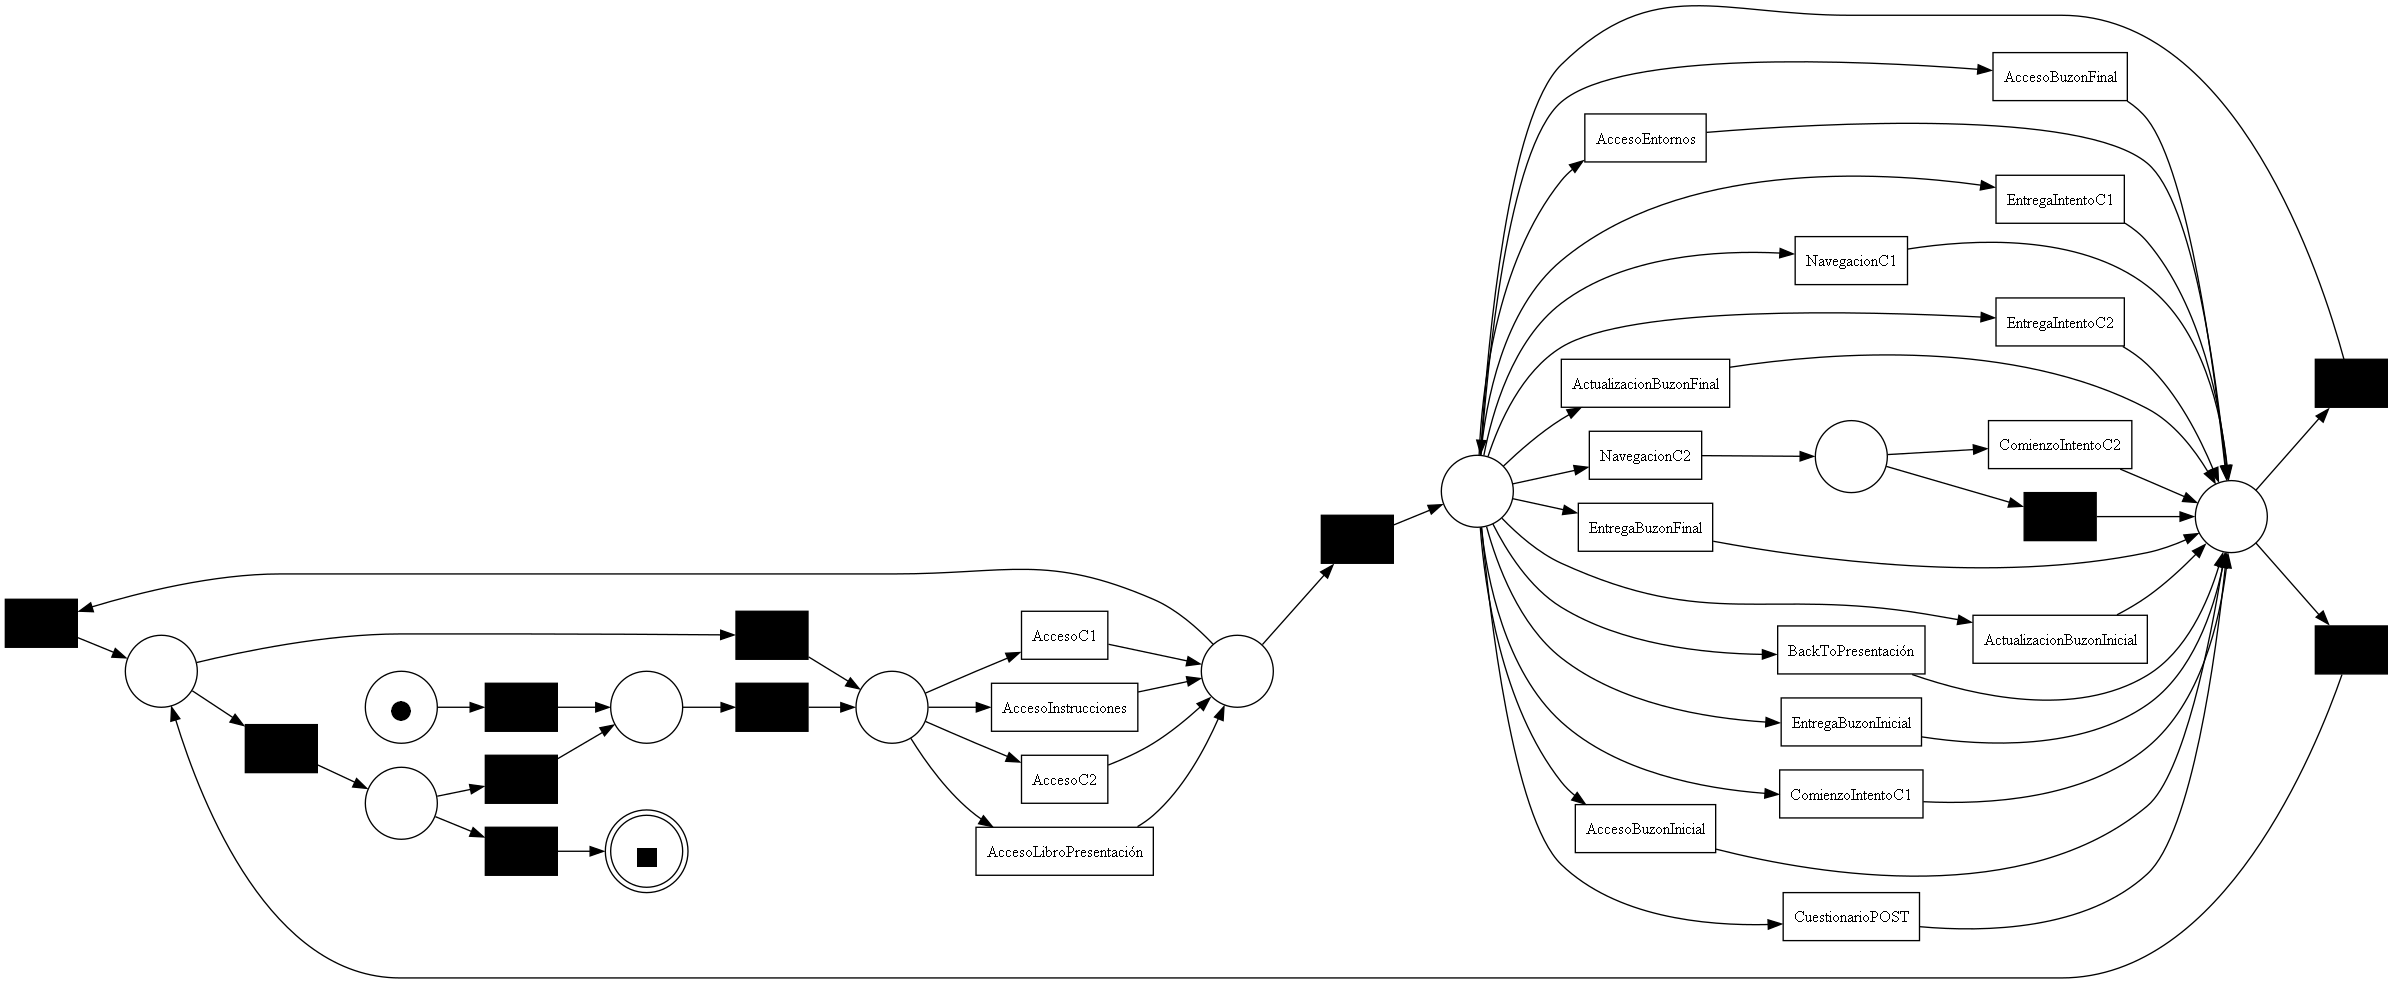

In [8]:
# Red Petri
net, im, fm = pm4py.discover_petri_net_inductive(event_log_filtered)
pm4py.view_petri_net(net, im, fm)
pm4py.save_vis_petri_net(net, im, fm, 'Graphs/5-A1_full.png')

In [9]:
# Conformance checking
print(pm4py.fitness_token_based_replay(event_log_filtered, net, im, fm))
print(pm4py.precision_token_based_replay(event_log_filtered, net, im, fm))
print(generalization_evaluator.apply(event_log_filtered, net, im, fm))
print(simplicity_evaluator.apply(net))

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

0.2466404893387356


replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

0.8657763572428574
0.5


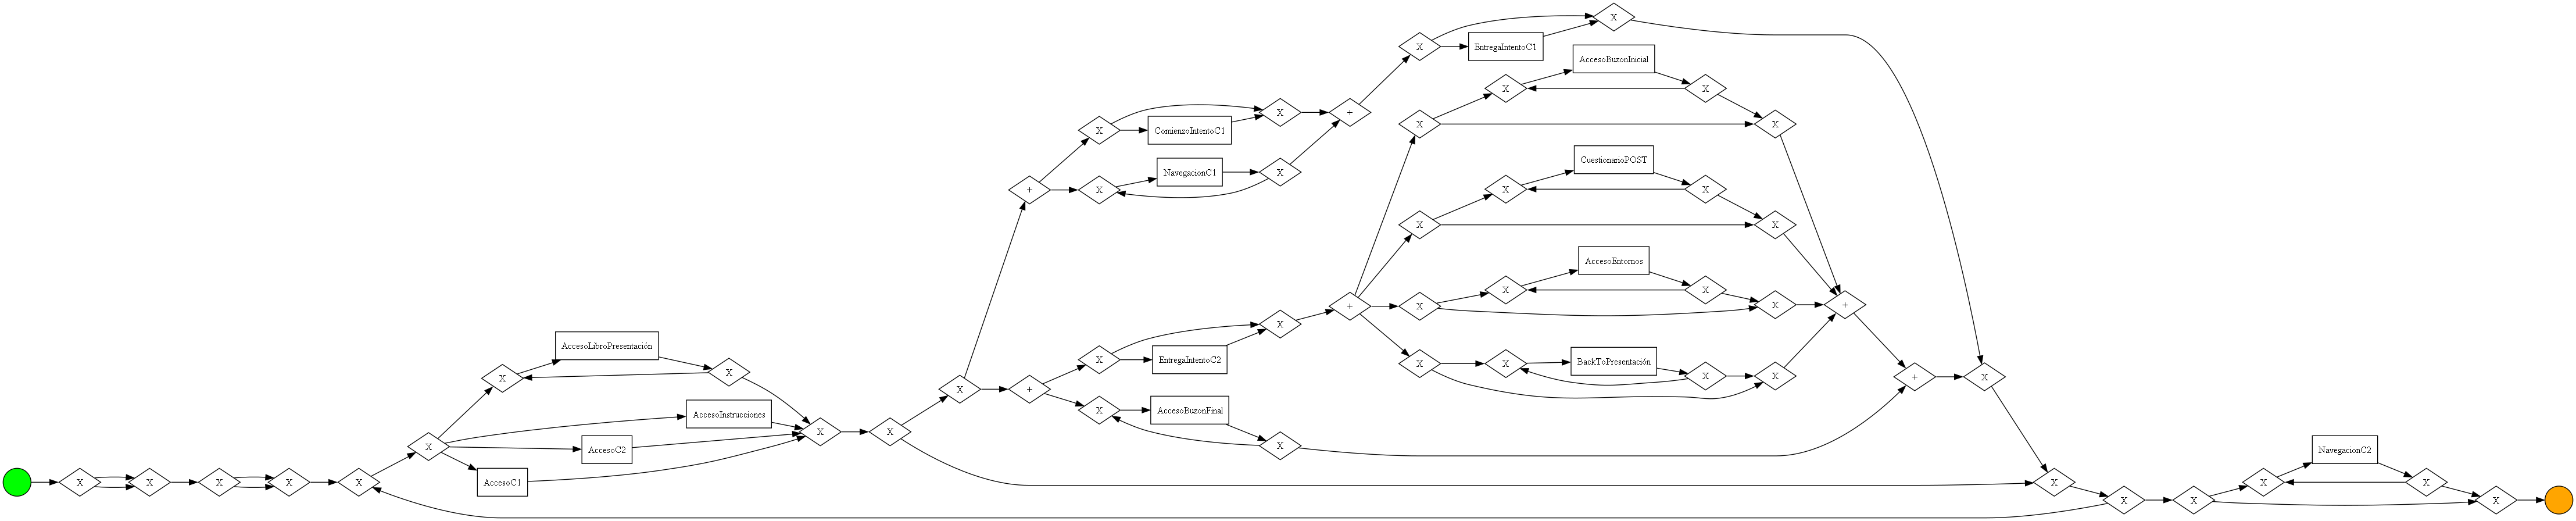

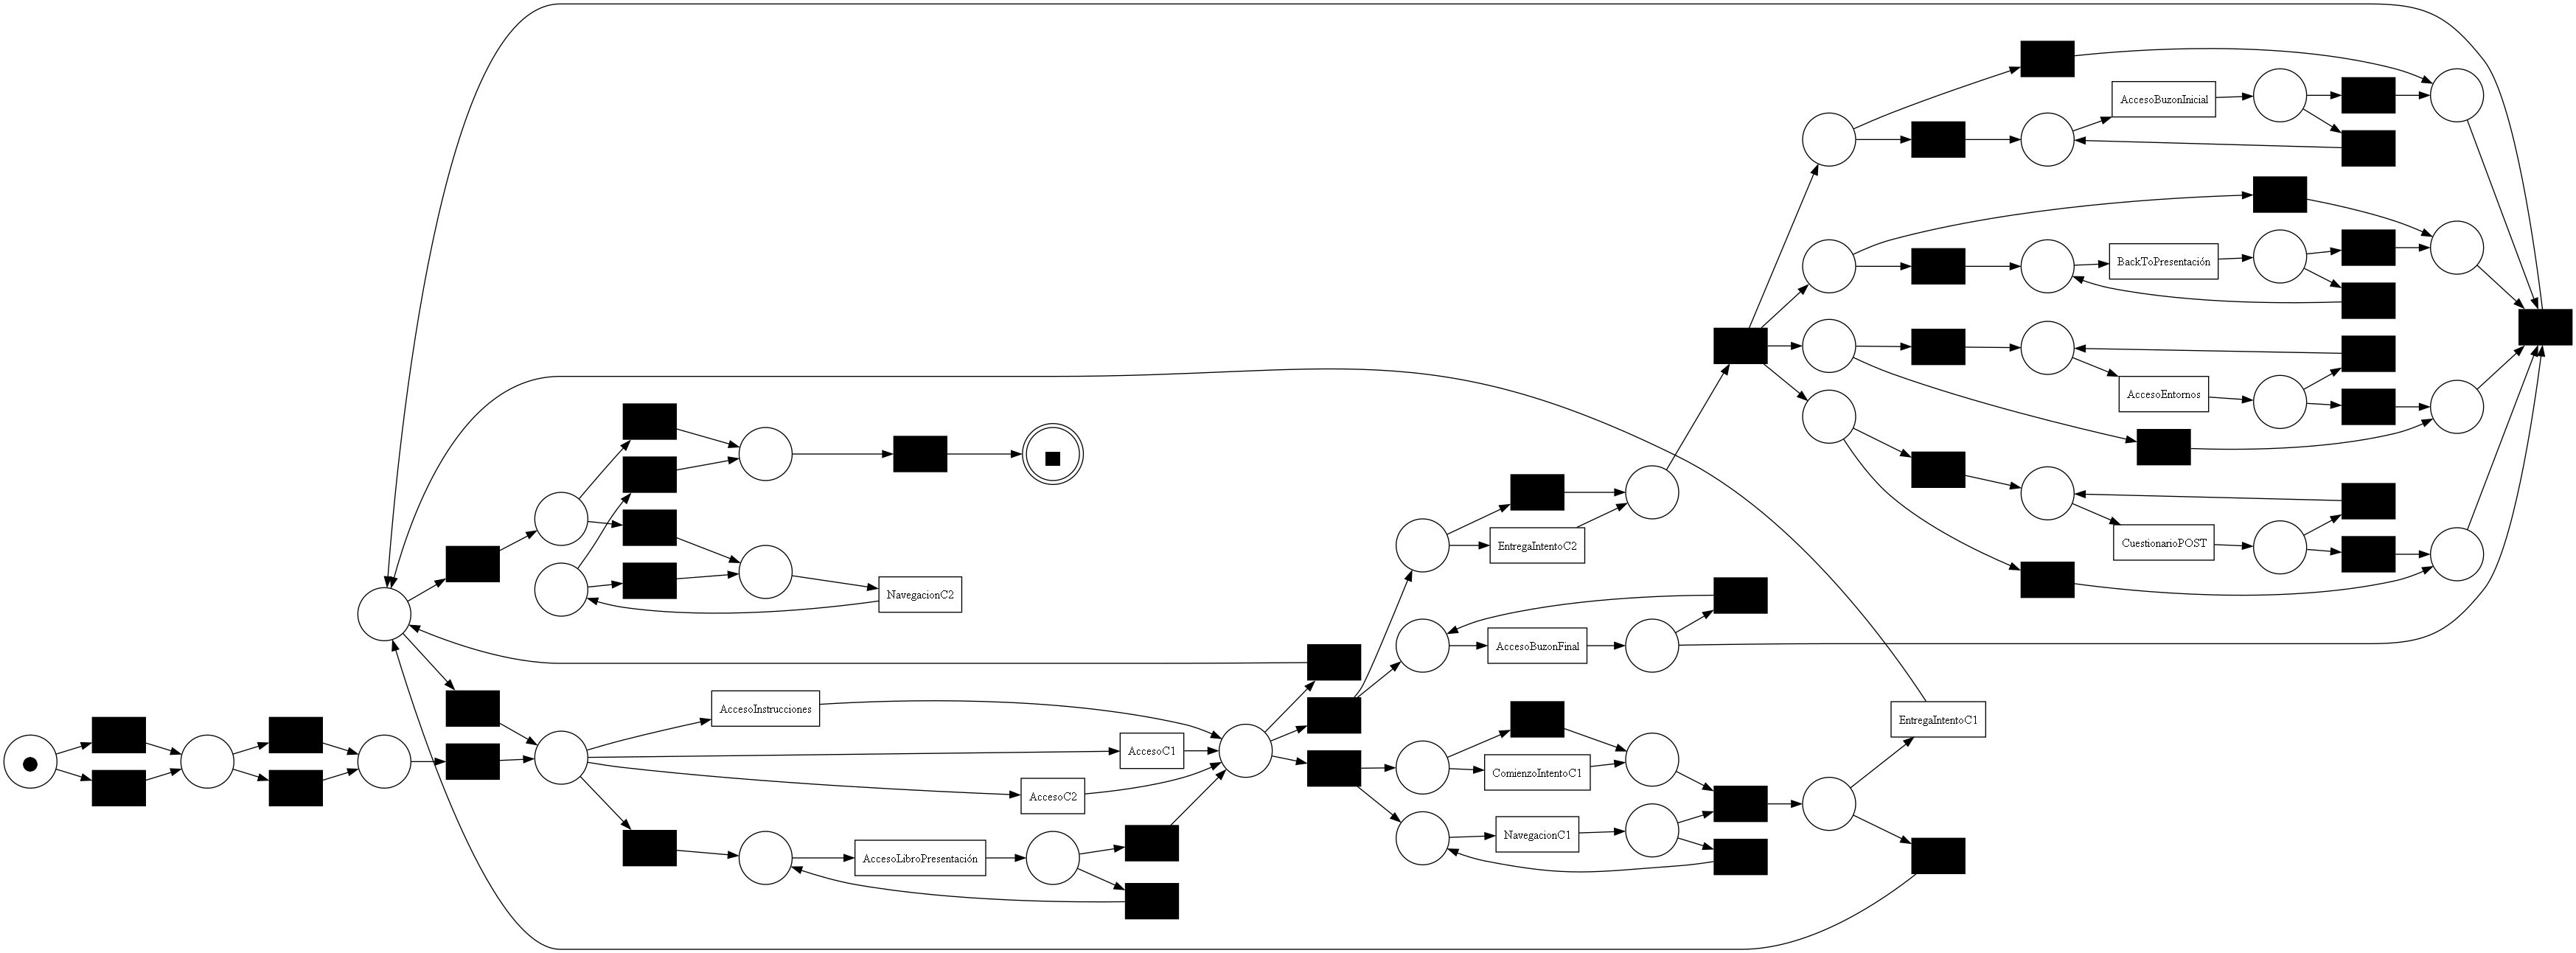

In [10]:
# Modelo BPMN con filtro de ruido
process_tree_f = pm4py.discover_process_tree_inductive(event_log_filtered, noise_threshold=0.15)
bpmn_model_f = pm4py.convert_to_bpmn(process_tree_f)
pm4py.view_bpmn(bpmn_model_f)
pm4py.save_vis_bpmn(bpmn_model_f, 'Graphs/1-A1_noise.png')

# Red Petri con filtro de ruido
net, im, fm = pm4py.discover_petri_net_inductive(event_log_filtered, noise_threshold=0.15)
pm4py.view_petri_net(net, im, fm)
pm4py.save_vis_petri_net(net, im, fm, 'Graphs/5-A1_noise.png')

In [11]:
# Parameter comparison - noise_threshold
noise_th = np.arange(0, 1, 0.01).tolist()
fitness_avg_trace = list()
prec_vec = list()
gen_vec = list()
simplicity_v = list()

for nt in noise_th:
    netb, imb, fmb = pm4py.discover_petri_net_inductive(event_log_filtered, noise_threshold=nt)

    dFitness = pm4py.fitness_token_based_replay(event_log_filtered, netb, imb, fmb)
    fitness_avg_trace.append(dFitness['average_trace_fitness'])
    prec_value = pm4py.precision_token_based_replay(event_log_filtered, netb, imb, fmb)
    prec_vec.append(prec_value)
    gen_vec.append(generalization_evaluator.apply(event_log_filtered, netb, imb, fmb))
    simplicity_v.append(simplicity_evaluator.apply(netb))

# print(len(prec_vec))
# # print(prec_vec)

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2558 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/91 [00:00<?, ?it/s]

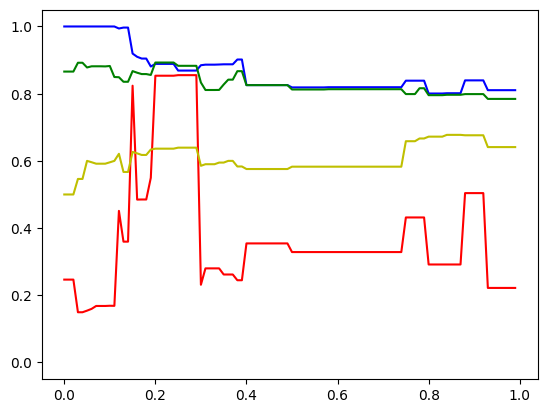

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(noise_th, fitness_avg_trace, color='b')
ax.plot(noise_th, prec_vec, color='r')
ax.plot(noise_th, gen_vec, color='g')
ax.plot(noise_th, simplicity_v, color='y')
ax.set_ylim([-0.05, 1.05])
plt.show()

In [13]:
# # First aproach for heuristics:
# values = np.round(np.arange(0, 1, 0.1), 1).tolist()
#
# for v in values:
#     map_dep = pm4py.discover_heuristics_net(event_log_filtered, dependency_threshold=v)
#     pm4py.save_vis_heuristics_net(map_dep, 'Graphs/Heuristics/Dependency/{}.png'.format(v))
#     # similares
#     map_and = pm4py.discover_heuristics_net(event_log_filtered, and_threshold=v)
#     pm4py.save_vis_heuristics_net(map_and, 'Graphs/Heuristics/And/{}.png'.format(v))
#     # todos iguales
#     map_2 = pm4py.discover_heuristics_net(event_log_filtered, loop_two_threshold=v)
#     pm4py.save_vis_heuristics_net(map_2, 'Graphs/Heuristics/2-Loop/{}.png'.format(v))
#     # Todos similares

In [14]:
# values = np.round(np.arange(0, 1, 0.1), 1).tolist()
# for v in values:
#     map_0 = pm4py.discover_heuristics_net(event_log_filtered, dependency_threshold=v, and_threshold=v, loop_two_threshold=v)
#     pm4py.save_vis_heuristics_net(map_0, 'Graphs/Heuristics/All/{}.png'.format(v))

In [15]:
# values = np.round(np.arange(0, 1, 0.1), 1).tolist()
#
# for d in values:
#     for a in values:
#         for l in values:
#             map_0 = pm4py.discover_heuristics_net(event_log_filtered, dependency_threshold=d, and_threshold=a, loop_two_threshold=l)
#             pm4py.save_vis_heuristics_net(map_0, 'Graphs/Heuristics/Multiple/D{}-A{}-L{}.png'.format(d, a, l))